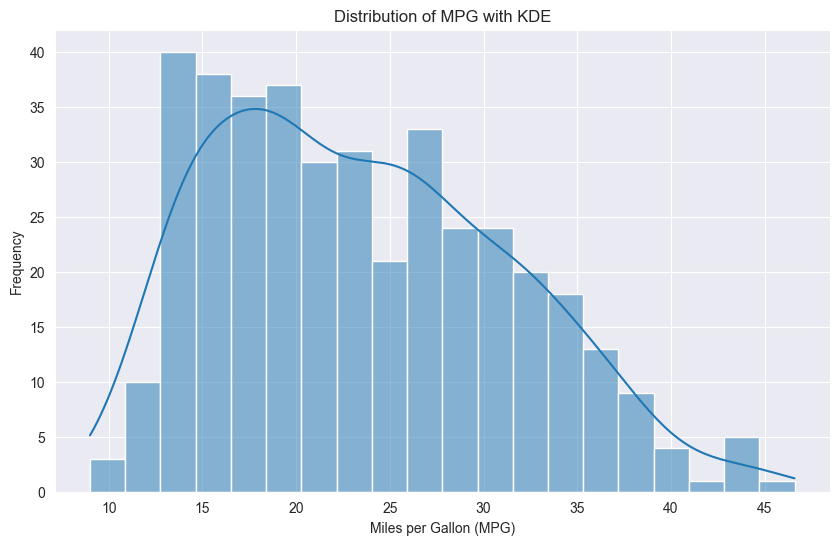

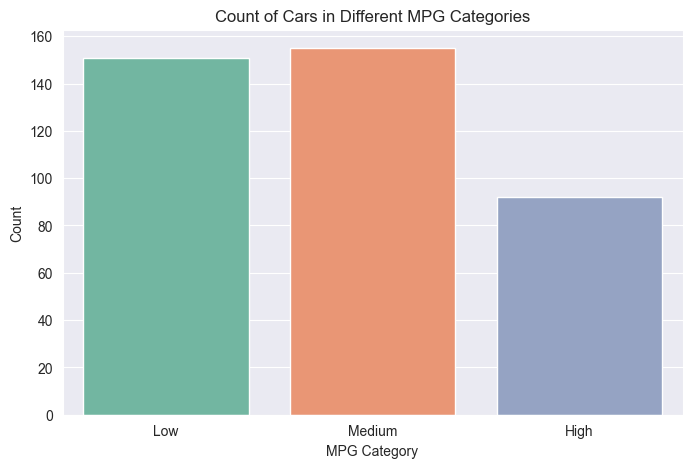

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")

# mpg 데이터셋을 CSV 파일로 저장
mpg.to_csv("./mpg.csv", index=False)

# 연비 범주화 함수 정의
def categorize_mpg(x):
    if x < 20:
        return "Low"
    elif x < 30:
        return "Medium"
    else:
        return "High"

# 예제 1: 자동차 연비(mpg)의 분포 및 구간별 시각화
#
# 문제 설명
# mpg 데이터셋을 불러옵니다.
# 자동차 연비(mpg)의 전반적인 분포를 히스토그램으로 시각화하고,
# 커널 밀도 곡선(KDE)을 함께 그려보세요.
# 연비를 범주화(예: ‘저연비’, ‘중연비’, ‘고연비’)해서 막대 그래프로 시각화해보고,
# 각 범주에 속하는 자동차가 몇 대인지 확인하세요.

# 연비를 범주화하여 새로운 열 추가
mpg['mpg_category'] = mpg['mpg'].apply(categorize_mpg)

# 1. 연비(mpg)의 전반적인 분포를 히스토그램과 커널 밀도 곡선(KDE)으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(mpg['mpg'], kde=True, bins=20)
plt.title('Distribution of MPG with KDE')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')
plt.show()

# 2. 연비 범주화 후, 각 범주에 속하는 자동차가 몇 대 있는지 막대 그래프 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='mpg_category', data=mpg, palette="Set2", hue='mpg_category')
plt.title('Count of Cars in Different MPG Categories')
plt.xlabel('MPG Category')
plt.ylabel('Count')
plt.show()

    mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70


<Axes: >

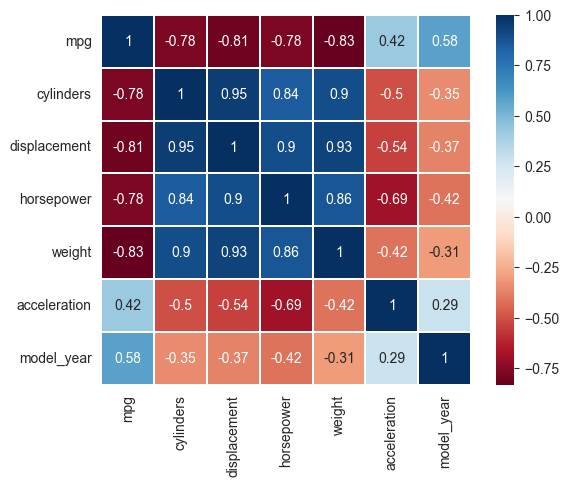

In [12]:
# 예제 2: 숫자형 변수 간 상관관계 분석 (Heatmap)
#
# 문제 설명
# mpg 데이터셋에서 숫자형 열
# (예: mpg, displacement, horsepower, weight, acceleration)만
# 골라서 새로운 데이터프레임을 생성합니다.
# (결측치 제거 : dropna())
#
# 이들 변수 간 상관계수를 구한 뒤, Seaborn의 heatmap으로 시각화해보세요.
# 상관계수를 해석하고, 어떤 변수들이 연비(mpg)와 밀접한 관계가 있는지 논의해보세요.

# mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")

# 숫자형 열만 선택 (float64, int64 타입)
numeric_columns = mpg.select_dtypes(include=['float64', 'int64'])

# 결측치 제거
numeric_columns_cleaned = numeric_columns.dropna()

# 결과 확인
print(numeric_columns_cleaned.head())

# 3. 숫자형 변수 간 상관관계 분석 (Heatmap)
result = numeric_columns_cleaned.corr()
colormap = plt.cm.RdBu
sns.heatmap(result, linewidths=0.1, vmax= 1.0 , square=True, cmap = colormap, linecolor="white", annot = True, annot_kws={"size": 10})

<Axes: xlabel='horsepower', ylabel='mpg'>

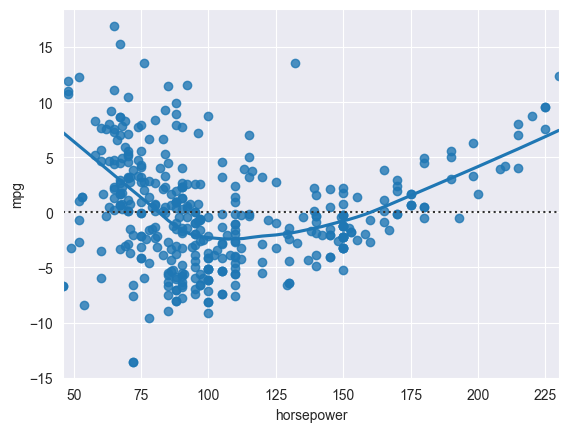

In [14]:
from statsmodels.formula.api import ols

Rformula = "mpg ~ horsepower + weight"

regression_result = ols(Rformula, data = mpg).fit()

# 회귀 분석 요약을 출력.
regression_result.summary()

# 부분 회귀 플롯 그리기
sns.residplot(mpg, x="horsepower", y="mpg", lowess=True)